## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importing Dataset

In [2]:
book_ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")

## Basic Analysis

In [3]:
book_ratings.head(10)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
5,276733,2080674722,0
6,276736,3257224281,8
7,276737,0600570967,6
8,276744,038550120X,7
9,276745,342310538,10


In [4]:
book_ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [5]:
book_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
User-ID        1149780 non-null int64
ISBN           1149780 non-null object
Book-Rating    1149780 non-null int64
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


## Replacing missing values by *np.nan*

In [6]:
book_ratings.replace(0, np.nan, inplace = True)

## Counting the number of missing values in each Column

In [7]:
book_ratings.isnull().sum()

User-ID             0
ISBN                0
Book-Rating    716109
dtype: int64

## Visualizing the number of Missing Values in each column

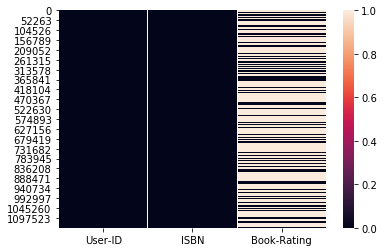

In [8]:
sns.heatmap(book_ratings.isnull())

# Data Visualization

## Most used ratings by the users

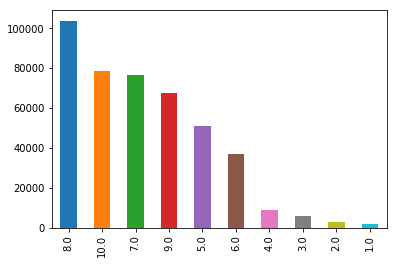

In [9]:
book_ratings['Book-Rating'].value_counts().plot(kind = 'bar')

In [10]:
len(book_ratings['ISBN'].unique()), len(book_ratings['ISBN'])

(340556, 1149780)

## Most Read Books

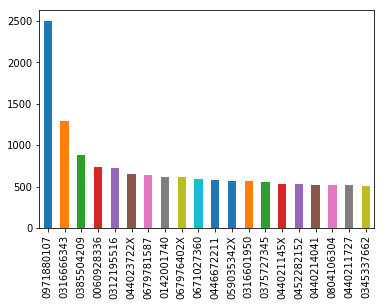

In [11]:
book_ratings['ISBN'].value_counts()[:20].plot(kind = 'bar')

In [12]:
len(book_ratings['User-ID'].unique())

105283

## Top 20 Readers (wrt the number of books read)

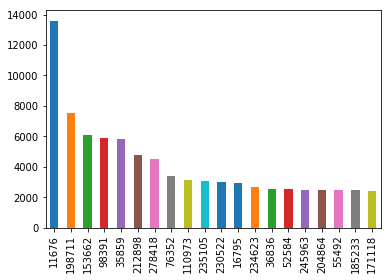

In [13]:
book_ratings['User-ID'].value_counts()[:20].plot(kind = 'bar')

## Looking at the user who read the most number of books

In [14]:
top_user_data = book_ratings[book_ratings['User-ID'] == 11676].dropna()

In [15]:
top_user_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8524 entries, 45326 to 58927
Data columns (total 3 columns):
User-ID        8524 non-null int64
ISBN           8524 non-null object
Book-Rating    8524 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 266.4+ KB


In [16]:
top_user_data.describe()

,User-ID,Book-Rating
count,8524.0,8524.000000
mean,11676.0,7.284374
std,0.0,2.029429
min,11676.0,1.000000
25%,11676.0,6.000000
50%,11676.0,8.000000
75%,11676.0,9.000000
max,11676.0,10.000000


# Importing the Books-Dataset

In [17]:
books_data = pd.read_csv('BX-Books.csv', sep=';', error_bad_lines=False, encoding='latin-1')
books_data.columns = ['ISBN', 'book-title', 'author', 'year-of-publication', 'publisher', 'img-url-s', 'img-url-m', 'img-url-l']

Skipping line 6452: expected 8 fields, saw 9
Skipping line 43667: expected 8 fields, saw 10
Skipping line 51751: expected 8 fields, saw 9

Skipping line 92038: expected 8 fields, saw 9
Skipping line 104319: expected 8 fields, saw 9
Skipping line 121768: expected 8 fields, saw 9

Skipping line 144058: expected 8 fields, saw 9
Skipping line 150789: expected 8 fields, saw 9
Skipping line 157128: expected 8 fields, saw 9
Skipping line 180189: expected 8 fields, saw 9
Skipping line 185738: expected 8 fields, saw 9

Skipping line 209388: expected 8 fields, saw 9
Skipping line 220626: expected 8 fields, saw 9
Skipping line 227933: expected 8 fields, saw 11
Skipping line 228957: expected 8 fields, saw 10
Skipping line 245933: expected 8 fields, saw 9
Skipping line 251296: expected 8 fields, saw 9
Skipping line 259941: expected 8 fields, saw 9
Skipping line 261529: expected 8 fields, saw 9

/home/revant/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Colu

## Merging it with the existing Dataset

In [18]:
dataset = book_ratings.merge(books_data, on = 'ISBN')

In [19]:
dataset.head()

,User-ID,ISBN,Book-Rating,book-title,author,year-of-publication,publisher,img-url-s,img-url-m,img-url-l
0,276725,034545104X,NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


## Removing unnecessary columns

In [20]:
dataset.drop(columns = ['img-url-s', 'img-url-m', 'img-url-l'], inplace = True)

## No. Of Books Published by the Authors (Top 10)

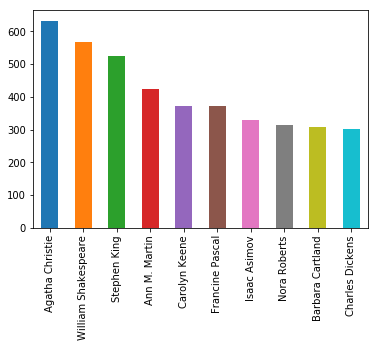

In [21]:
books_data['author'].value_counts()[:10].plot(kind = 'bar')

## No. of Books Published by the Publishers (Top 10)

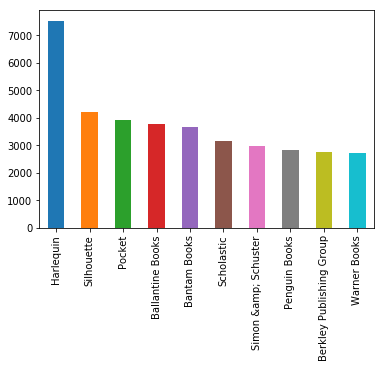

In [22]:
books_data['publisher'].value_counts()[:10].plot(kind = 'bar')

## Adding a column  ```total_books_written``` by the author

In [24]:
author_books_counts = books_data['author'].value_counts()

In [25]:
author_list = dataset['author']
len(author_list)

1031136

In [26]:
l = []
for author in author_list:
    try:
        l += [author_books_counts[str(author)]]
    except :
        l += [np.nan]

In [27]:
dataset['total_books_written'] = l 
del author_list
del l

## Adding a column  ```total_books_published``` by the publisher

In [28]:
publisher_books_counts = books_data['publisher'].value_counts()

In [29]:
publisher_list = dataset['publisher']
len(publisher_list)

1031136

In [30]:
l = []
for publisher in publisher_list:
    try:
        l += [publisher_books_counts[publisher]]
#     print(publisher_books_counts[publisher])
#     break
    except :
#         print(publisher[0], end = ' ')
        l += [np.nan]

In [31]:
dataset['total_books_published'] = l
del l
del publisher_list

# Visualizing the results

## Number of authors VS Number of books written

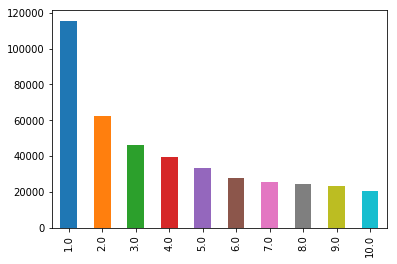

In [32]:
dataset['total_books_written'].value_counts()[:10].plot(kind = 'bar')

## Number of Books written by the Authors (Descencing Order) (Top 10)

In [33]:
dataset.dropna()[['author', 'Book-Rating', 'total_books_written']].groupby('author').mean().sort_values(['total_books_written', 'Book-Rating'], ascending = False).iloc[:20, :]

,Book-Rating,total_books_written
author,,
Agatha Christie,7.792102,632.0
William Shakespeare,8.303357,567.0
Stephen King,7.815046,524.0
Ann M. Martin,6.708333,423.0
Carolyn Keene,7.823529,373.0
Francine Pascal,6.659091,372.0
Isaac Asimov,7.915167,330.0
Nora Roberts,7.629680,315.0
Barbara Cartland,5.041812,307.0


## Number of Books Published by the Publishers (Descencing Order) (Top 10)

In [34]:
dataset.dropna()[['publisher', 'Book-Rating', 'total_books_published']].groupby('publisher').mean().sort_values(['total_books_published', 'Book-Rating'], ascending = False).iloc[:20, :]

,Book-Rating,total_books_published
publisher,,
Harlequin,7.170115,7535.0
Silhouette,7.239616,4220.0
Pocket,7.565354,3905.0
Ballantine Books,7.610437,3783.0
Bantam Books,7.520811,3646.0
Scholastic,7.818161,3160.0
Simon &amp; Schuster,7.522894,2971.0
Penguin Books,7.772837,2844.0
Berkley Publishing Group,7.443836,2771.0


# Importing The User Dataset

In [35]:
users_data = pd.read_csv('BX-Users.csv', error_bad_lines=False, sep=';', encoding = 'latin-1')

## Merging it with the existing dataset

In [36]:
dataset = dataset.merge(users_data, on = 'User-ID')

In [37]:
dataset.head()

,User-ID,ISBN,Book-Rating,book-title,author,year-of-publication,publisher,total_books_written,total_books_published,Location,Age
0,276725,034545104X,NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,3.0,3783.0,"tyler, texas, usa",NaN
1,2313,034545104X,5.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,3.0,3783.0,"cincinnati, ohio, usa",23.0
2,2313,0812533550,9.0,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,130.0,1704.0,"cincinnati, ohio, usa",23.0
3,2313,0679745580,8.0,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,4.0,437.0,"cincinnati, ohio, usa",23.0
4,2313,0060173289,9.0,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,21.0,845.0,"cincinnati, ohio, usa",23.0


## Average Age of the User of each Rating
I know it's silly

In [37]:
dataset[['Age', 'Book-Rating']].groupby('Book-Rating').mean()

,Age
Book-Rating,
1.0,33.699774
2.0,34.544174
3.0,35.401381
4.0,35.815934
5.0,36.914035
6.0,36.157006
7.0,36.453457
8.0,37.265627
9.0,37.424366


In [38]:
dataset['age-group'] = pd.qcut(dataset['Age'], 10)

In [39]:
dataset[['age-group','book-title']].groupby('age-group').agg(lambda x:x.value_counts().index[0])

,book-title
age-group,
"(-0.001, 23.0]",Wild Animus
"(23.0, 27.0]",Wild Animus
"(27.0, 30.0]",Wild Animus
"(30.0, 32.0]",Wild Animus
"(32.0, 35.0]",Wild Animus
"(35.0, 38.0]",Wild Animus
"(38.0, 43.0]",Wild Animus
"(43.0, 48.0]",Wild Animus
"(48.0, 54.0]",Wild Animus


In [40]:
del dataset['age-group']

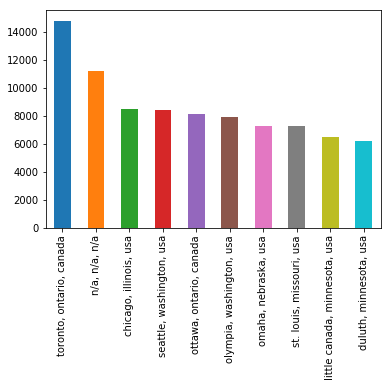

In [41]:
dataset['Location'].value_counts()[:10].plot(kind = 'bar')

In [42]:
top_locations = dataset['Location'].value_counts()[:10]
dataset[['Location', 'book-title']].groupby('Location').agg(lambda x: x.value_counts().index[0])

,book-title
Location,
"&#304;stanbul, n/a, turkey",I'm a Stranger Here Myself : Notes on Returnin...
"&#321;ód&#378;, &#322;ódzkie, poland",Wild Animus
"&#321;ód&#378;, n/a, poland",Nowe opowiadania
"&#321;ód&#380;, &#322;ódzkie, poland",Bezpowrotnie utracona leworecznosc
"&#36149;&#28207;, &#24191;&#35199;, china",Brighton Rock (Essential.penguin S.)
"***********, illinois, usa",Making Minty Malone
"*, virginia, usa",Finding Your Roots
", ,",House of Sand and Fog
", , belize",The Summons


In [38]:
dataset.head()

,User-ID,ISBN,Book-Rating,book-title,author,year-of-publication,publisher,total_books_written,total_books_published,Location,Age
0,276725,034545104X,NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,3.0,3783.0,"tyler, texas, usa",NaN
1,2313,034545104X,5.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,3.0,3783.0,"cincinnati, ohio, usa",23.0
2,2313,0812533550,9.0,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,130.0,1704.0,"cincinnati, ohio, usa",23.0
3,2313,0679745580,8.0,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,4.0,437.0,"cincinnati, ohio, usa",23.0
4,2313,0060173289,9.0,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,21.0,845.0,"cincinnati, ohio, usa",23.0


In [39]:
dataset.head()

,User-ID,ISBN,Book-Rating,book-title,author,year-of-publication,publisher,total_books_written,total_books_published,Location,Age
0,276725,034545104X,NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,3.0,3783.0,"tyler, texas, usa",NaN
1,2313,034545104X,5.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,3.0,3783.0,"cincinnati, ohio, usa",23.0
2,2313,0812533550,9.0,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,130.0,1704.0,"cincinnati, ohio, usa",23.0
3,2313,0679745580,8.0,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,4.0,437.0,"cincinnati, ohio, usa",23.0
4,2313,0060173289,9.0,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,21.0,845.0,"cincinnati, ohio, usa",23.0


In [40]:
dataset.to_pickle('dataset.pickle')

In [ ]:
farzi_dataset = dataset.query('total')

In [45]:
dataset.isnull().sum()

User-ID                       0
ISBN                          0
Book-Rating              647294
book-title                    0
author                        1
year-of-publication           0
publisher                     2
total_books_written           1
total_books_published         2
Location                      0
Age                      277835
dtype: int64

In [46]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 11 columns):
User-ID                  1031136 non-null int64
ISBN                     1031136 non-null object
Book-Rating              383842 non-null float64
book-title               1031136 non-null object
author                   1031135 non-null object
year-of-publication      1031136 non-null object
publisher                1031134 non-null object
total_books_written      1031135 non-null float64
total_books_published    1031134 non-null float64
Location                 1031136 non-null object
Age                      753301 non-null float64
dtypes: float64(4), int64(1), object(6)
memory usage: 134.4+ MB


In [41]:
dataset.dropna(axis = 0, subset = ['book-title'], inplace = True)

In [42]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 11 columns):
User-ID                  1031136 non-null int64
ISBN                     1031136 non-null object
Book-Rating              383842 non-null float64
book-title               1031136 non-null object
author                   1031135 non-null object
year-of-publication      1031136 non-null object
publisher                1031134 non-null object
total_books_written      1027484 non-null float64
total_books_published    1031134 non-null float64
Location                 1031136 non-null object
Age                      753301 non-null float64
dtypes: float64(4), int64(1), object(6)
memory usage: 94.4+ MB


In [43]:
a = pd.DataFrame(dataset['book-title'].value_counts().reset_index())
a.columns = ['book-title', 'book-ratings-count']
# a.rename_axis('book-title', axis = 'columns', inplace = True)

In [44]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241071 entries, 0 to 241070
Data columns (total 2 columns):
book-title            241071 non-null object
book-ratings-count    241071 non-null int64
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [45]:
# a['book-title'] = list(a.axes[0])

In [46]:
len(dataset[dataset['book-title'] == 'Flesh Tones: A Novel'])

60

In [47]:
dataset = dataset.merge(a, on = 'book-title')

In [48]:
dataset['book-ratings-count'].describe()

count    1.031136e+06
mean     6.978162e+01
std      1.753381e+02
min      1.000000e+00
25%      3.000000e+00
50%      1.300000e+01
75%      6.100000e+01
max      2.502000e+03
Name: book-ratings-count, dtype: float64

In [55]:
a['book-ratings-count'].quantile(np.arange(0.9, 1, 0.01))

0.90     7.0
0.91     8.0
0.92     9.0
0.93    10.0
0.94    11.0
0.95    13.0
0.96    16.0
0.97    20.0
0.98    29.0
0.99    50.0
Name: book-ratings-count, dtype: float64

In [49]:
dataset.head()

,User-ID,ISBN,Book-Rating,book-title,author,year-of-publication,publisher,total_books_written,total_books_published,Location,Age,book-ratings-count
0,276725,034545104X,NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,3.0,3783.0,"tyler, texas, usa",NaN,60
1,2313,034545104X,5.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,3.0,3783.0,"cincinnati, ohio, usa",23.0,60
2,6543,034545104X,NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,3.0,3783.0,"strafford, missouri, usa",34.0,60
3,8680,034545104X,5.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,3.0,3783.0,"st. charles county, missouri, usa",2.0,60
4,10314,034545104X,9.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,3.0,3783.0,"beaverton, oregon, usa",NaN,60


In [50]:
user_rating_counts = pd.DataFrame(dataset['User-ID'].value_counts())
user_rating_counts.reset_index(inplace = True)
user_rating_counts.columns = ['User-ID', 'user-rating-counts']

In [51]:
user_rating_counts.head()

,User-ID,user-rating-counts
0,11676,11144
1,198711,6456
2,153662,5814
3,98391,5779
4,35859,5646


In [52]:
dataset = dataset.merge(user_rating_counts, on = 'User-ID')

In [53]:
dataset.head()

,User-ID,ISBN,Book-Rating,book-title,author,year-of-publication,publisher,total_books_written,total_books_published,Location,Age,book-ratings-count,user-rating-counts
0,276725,034545104X,NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,3.0,3783.0,"tyler, texas, usa",NaN,60,1
1,2313,034545104X,5.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,3.0,3783.0,"cincinnati, ohio, usa",23.0,60,36
2,2313,0812533550,9.0,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,130.0,1704.0,"cincinnati, ohio, usa",23.0,249,36
3,2313,0679745580,8.0,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,4.0,437.0,"cincinnati, ohio, usa",23.0,55,36
4,2313,0060173289,9.0,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,21.0,845.0,"cincinnati, ohio, usa",23.0,130,36


In [54]:
dataset.to_pickle('finaldataset.pickle')